In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

LINE_WIDTH = 2
# sns.set()

In [3]:
def avrg(curve, weight):
    end = curve.shape[1] # min(c.BUDGET, curve.shape[1])
    stdCurve = curve[1, :end]; curve = curve[0, :end]
    avrg_mean = []
    avrg_std = []
    moving_mean = curve[0]
    moving_std = stdCurve[0]
    for i in range(1, len(curve)):
        moving_mean = weight * moving_mean + (1 - weight) * curve[i]
        moving_std = weight * moving_std + (1 - weight) * stdCurve[i]
        avrg_mean.append(moving_mean)
        avrg_std.append(moving_std)
    return np.array(avrg_mean), np.array(avrg_std)

In [4]:
def plot(curve_file, color, displayName, weight=0.9, alpha=0.8):
    curve = np.load(curve_file)
    if len(curve) > 2:
        # of the file contains many runs instead of mean and std
        curve = np.concatenate( [np.expand_dims(np.mean(curve, axis=0), axis=0),
                                 np.expand_dims(np.std(curve, axis=0), axis=0)],  axis=0)
    auc = round(sum(curve[0]) / len(curve[0]), 3)
    avrgCurve, stdCurve = avrg(curve, weight)

    improvement = round(avrgCurve[-1] - avrgCurve[0], 3)
    fullName = f"{displayName} improv. {improvement} auc {auc}"
    x = np.arange(len(avrgCurve))
    plt.fill_between(x, avrgCurve-stdCurve, avrgCurve+stdCurve, alpha=0.5, facecolor=color)
    plt.plot(x, avrgCurve, label=fullName, linewidth=LINE_WIDTH, c=color, alpha=alpha)

# Mock Environment

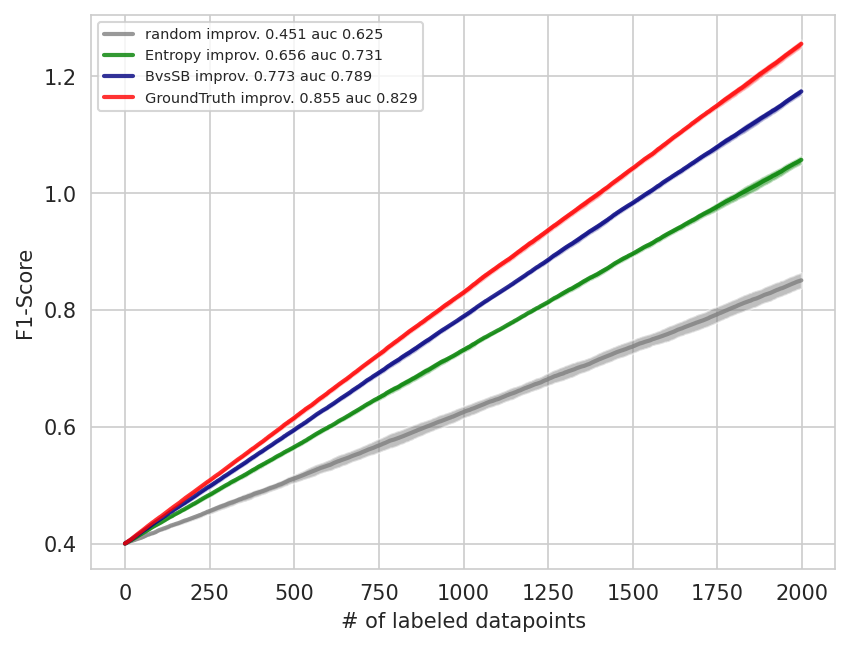

In [10]:
plt.figure(dpi=150)
plot('../baselines/mock/random.npy', 'gray', displayName='random', weight=0.0)
plot('../baselines/mock/entropy.npy', 'green', displayName='Entropy', weight=0.0)
plot('../baselines/mock/bvssb.npy', 'navy', displayName='BvsSB', weight=0.0)
plot('../baselines/mock/truth.npy', 'red', displayName='GroundTruth', weight=0.0)
# plot('../baselines/mock/linear.npy', 'orange', displayName='linear', weight=0.0)
# plot('../baselines/mock/agent_GT.npy', 'black', displayName='agent', weight=0.0)
# plot('../baselines/mock/agent.npy', 'black', displayName='agent', weight=0.0)
# plot('../baselines/mock/eval.npy', 'blue', displayName='Rainbow', weight=0.0)

#plt.title('Experiment 3 Comparison of the Agents')
plt.ylabel('F1-Score')
plt.xlabel('# of labeled datapoints')
#plt.ylim(0.5, 1)
plt.grid(visible=True)
plt.legend(fontsize='x-small')
plt.show()

# Cifar 10 Custom Embedding

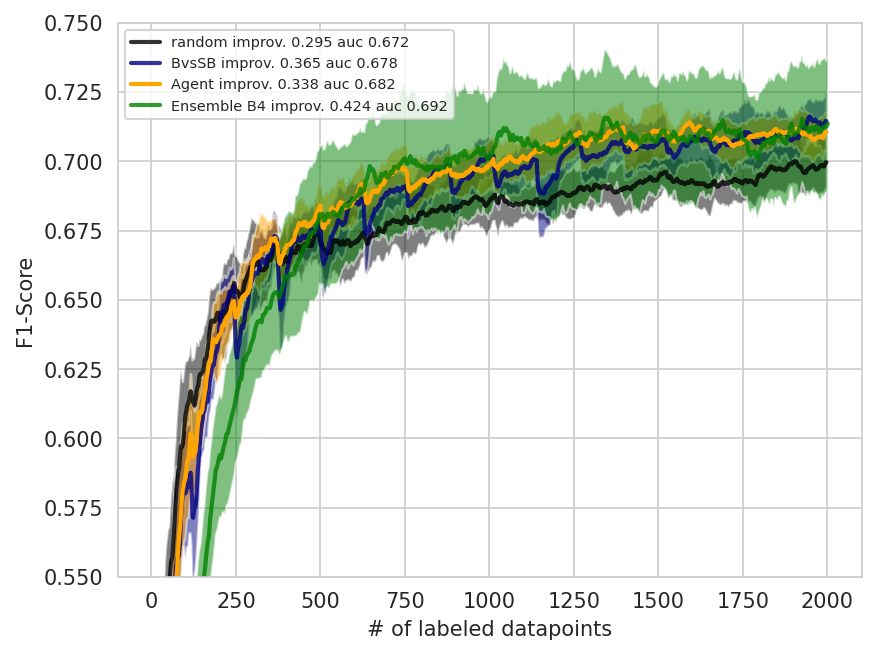

In [6]:
plt.figure(dpi=150)
plot('../baselines/cifar10_custom/random.npy', 'black', displayName='random', weight=0.8)
plot('../baselines/cifar10_custom/bvssb.npy', 'navy', displayName='BvsSB', weight=0.8)
plot('../baselines/cifar10_custom/agent_b2000_s20.npy', 'orange', displayName='Agent', weight=0.8, alpha=1.0)

# plot('../baselines/cifar10_custom/ensemble_b1.npy', 'red', displayName='Ensemble B1', weight=0.99)
# plot('../baselines/cifar10_custom/ensemble_b2.npy', 'purple', displayName='Ensemble B2', weight=0.99)
plot('../baselines/cifar10_custom/ensemble_b4.npy', 'green', displayName='Ensemble B4', weight=0.99)

#plt.title('Experiment 3 Comparison of the Agents')
plt.ylabel('F1-Score')
plt.xlabel('# of labeled datapoints')
plt.ylim(0.55, 0.75)
plt.grid(visible=True)
plt.legend(fontsize='x-small')
plt.show()

# Pan 17

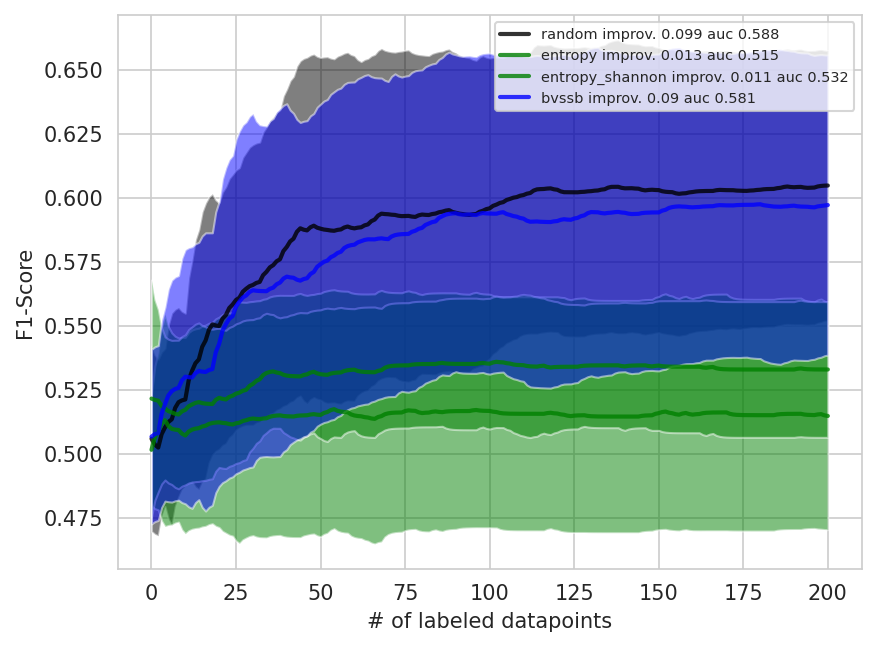

In [7]:
plt.figure(dpi=150)
plot('../baselines/pan17/random.npy', 'black', displayName='random', weight=0.5)
plot('../baselines/pan17/entropy.npy', 'green', displayName='entropy', weight=0.5)
plot('../baselines/pan17/shannon.npy', 'green', displayName='entropy_shannon', weight=0.5)
plot('../baselines/pan17/bvssb.npy', 'blue', displayName='bvssb', weight=0.5)

#plt.title('Experiment 3 Comparison of the Agents')
plt.ylabel('F1-Score')
plt.xlabel('# of labeled datapoints')
# plt.ylim(0.55, 0.75)
plt.grid(visible=True)
plt.legend(fontsize='x-small')
plt.show()